# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
!pip install citipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 675.6/675.6 kB 6.0 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for citipy: filename=citipy-0.0.6-py3-none-any.whl size=675967 sha256=97d65568dc7aa2c2631abb89b5a4f3dfd35b74c6a4239cfd65ce2e30b7904f1f
  Stored in directory: /Users/justinwiley/Library/Caches/pip/wheels/4b/b5/88/49107ff846ec6967b34c17d369176c591fc90ed93b706755ad
Successfully built citipy


In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from Config import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
url = f"http://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"
print(url + "&q=phoenix")

http://api.openweathermap.org/data/2.5/weather?units=metric&appid=98c63d69ddb759e2a2f7cf0f1a9c6452&q=phoenix


In [13]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | makueni boma
Processing Record 2 of Set 1 | warrenton
Processing Record 3 of Set 1 | fort mcmurray
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | mtambile
Processing Record 7 of Set 1 | papatowai
Processing Record 8 of Set 1 | wailua homesteads
Processing Record 9 of Set 1 | cabedelo
Processing Record 10 of Set 1 | college
Processing Record 11 of Set 1 | taiohae
City not found. Skipping...
Processing Record 12 of Set 1 | nova vicosa
Processing Record 13 of Set 1 | revelstoke
Processing Record 14 of Set 1 | arraial do cabo
Processing Record 15 of Set 1 | puerto aysen
Processing Record 16 of Set 1 | lebu
Processing Record 17 of Set 1 | pravokumskoye
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | tarnogskiy gorodok
Processing Record 20 of Set 1 | port elizabeth
Processing Record 21 of Set 1 | waitang

In [15]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [17]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,makueni boma,-1.8041,37.6203,18.86,79,64,3.07,KE,1722284583
1,warrenton,-28.1140,24.8475,5.08,26,1,1.49,ZA,1722284584
2,fort mcmurray,56.7268,-111.3810,28.77,42,75,5.66,CA,1722284586
3,grytviken,-54.2811,-36.5092,-1.45,79,100,2.87,GS,1722284587
4,adamstown,-25.0660,-130.1015,21.73,81,40,7.36,PN,1722284588


In [19]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [21]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,makueni boma,-1.8041,37.6203,18.86,79,64,3.07,KE,1722284583
1,warrenton,-28.1140,24.8475,5.08,26,1,1.49,ZA,1722284584
2,fort mcmurray,56.7268,-111.3810,28.77,42,75,5.66,CA,1722284586
3,grytviken,-54.2811,-36.5092,-1.45,79,100,2.87,GS,1722284587
4,adamstown,-25.0660,-130.1015,21.73,81,40,7.36,PN,1722284588


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

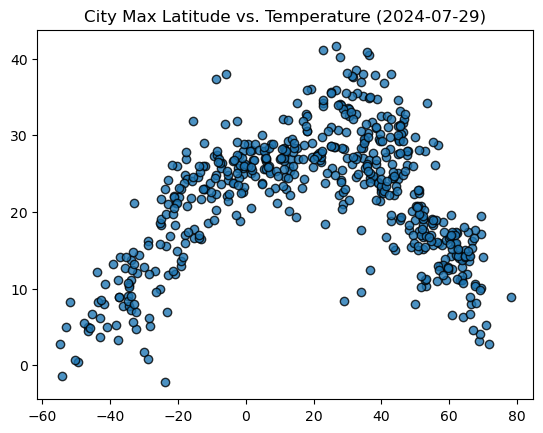

In [125]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities",
)

# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Temperature ({date})")
plt.xlabel=("Latitude")
plt.ylabel=("Max Temp")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

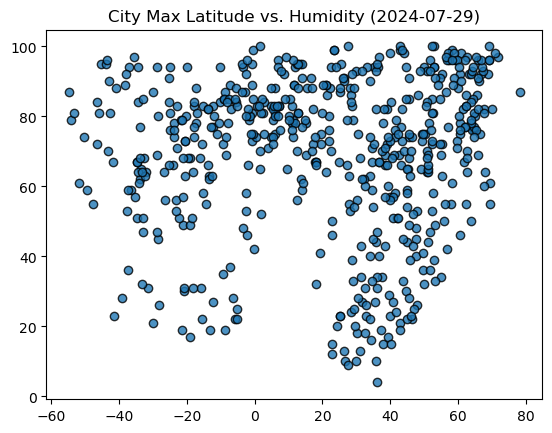

In [51]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities",
)

# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Humidity ({date})")
plt.xlabel=("Latitude")
plt.ylabel=("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

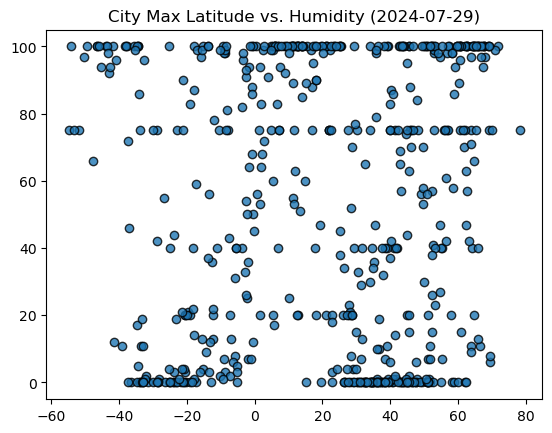

In [57]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities",
)

# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Humidity ({date})")
plt.xlabel=("Latitude")
plt.ylabel=("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

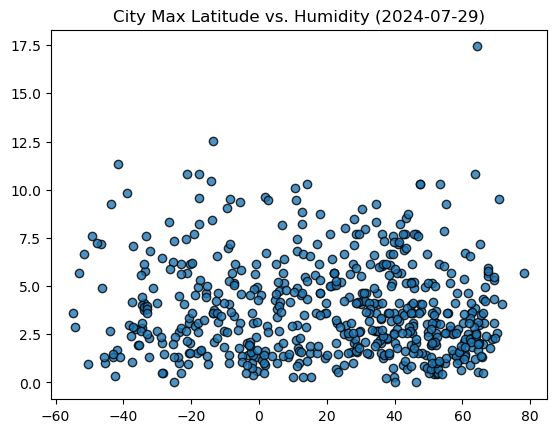

In [121]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities",
)

# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude vs. Humidity ({date})")
plt.xlabel=("Latitude")
plt.ylabel=("Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [80]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_value, y_value, title, text_coord):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_value = x_value * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

    plt.scatter(x_value,y_value)
    plt.plot(x_value, regress_value, "r-")
    plt.annotate(line_eq, text_coord, fontsize=15, color="red")
    plt.xlabel=("Lat")
    plt.ylabel=(title)
    print(f"The r-value is {rvalue ** 2}")
    plt.show()
    
    

    

In [82]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,fort mcmurray,56.7268,-111.3810,28.77,42,75,5.66,CA,1722284586
7,wailua homesteads,22.0669,-159.3780,26.44,80,75,5.66,US,1722284592
9,college,64.8569,-147.8028,14.18,80,100,2.06,US,1722284315
11,revelstoke,50.9832,-118.2023,20.01,64,100,5.14,CA,1722284597
15,pravokumskoye,44.7694,44.6472,24.35,30,0,5.20,RU,1722284602


In [84]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,makueni boma,-1.8041,37.6203,18.86,79,64,3.07,KE,1722284583
1,warrenton,-28.1140,24.8475,5.08,26,1,1.49,ZA,1722284584
3,grytviken,-54.2811,-36.5092,-1.45,79,100,2.87,GS,1722284587
4,adamstown,-25.0660,-130.1015,21.73,81,40,7.36,PN,1722284588
5,mtambile,-5.3833,39.7000,24.11,84,40,4.60,TZ,1722284589


###  Temperature vs. Latitude Linear Regression Plot

The r-value is 0.38576365057748013


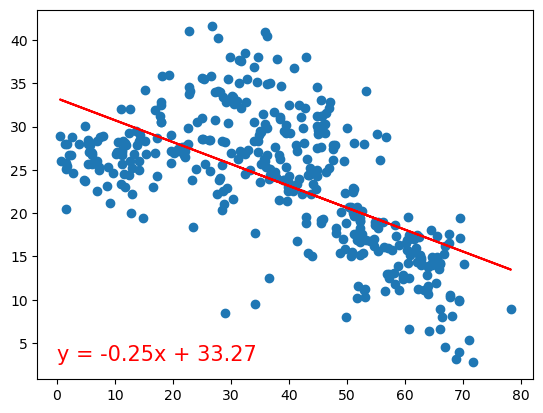

In [107]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (0, 3))

The r-value is 0.7038538399315265


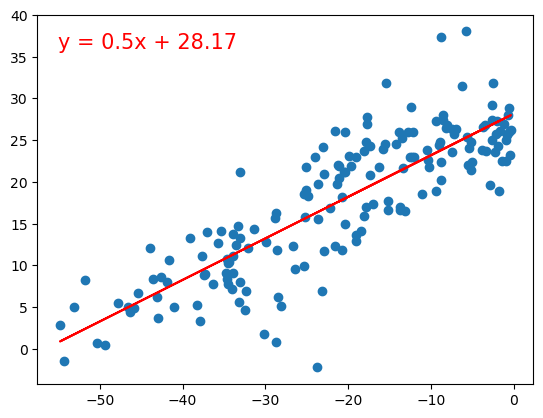

In [117]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55, 36))

**Discussion about the linear relationship:** Based on the two graphs presented I would conclude that in both hemispheres the linear regression is within the threshold. Showing that when the latitude range is around zero the temperature increases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.0014582913495418423


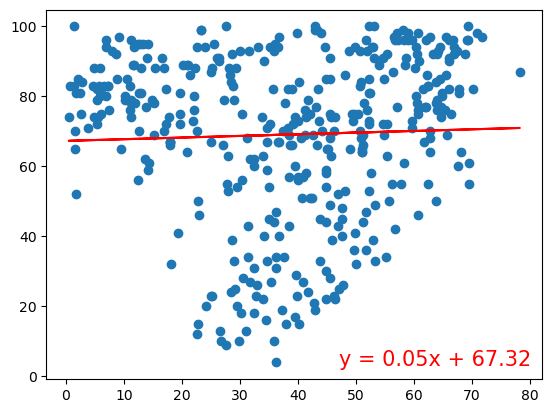

In [135]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Max Temp", (47, 3))

The r-value is 0.0006922075456812489


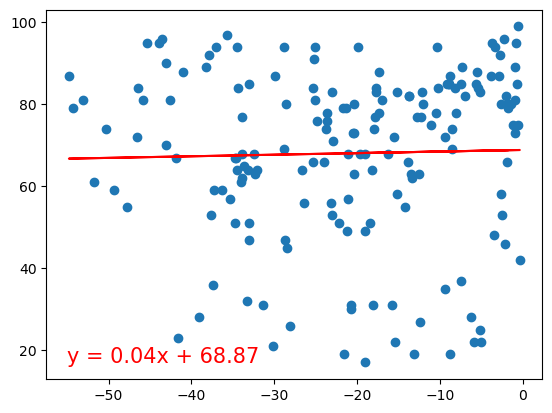

In [145]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55, 17))

**Discussion about the linear relationship:**  Based on the two graphs presented I would conclude that in both hemispheres the linear regression is at a constant level. Showing that latitude has the same effect in both hemispheres.  

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.003036674460631509


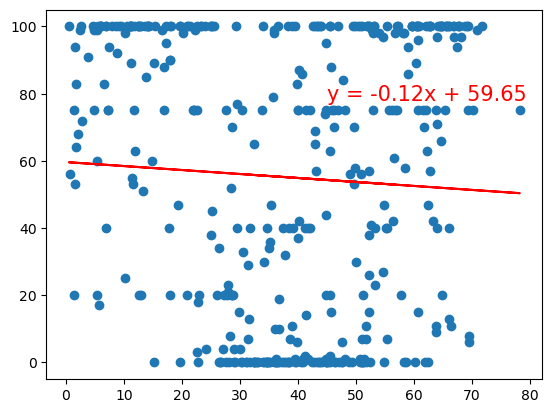

In [160]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Max Temp", (45, 78))

The r-value is 0.01580846888517991


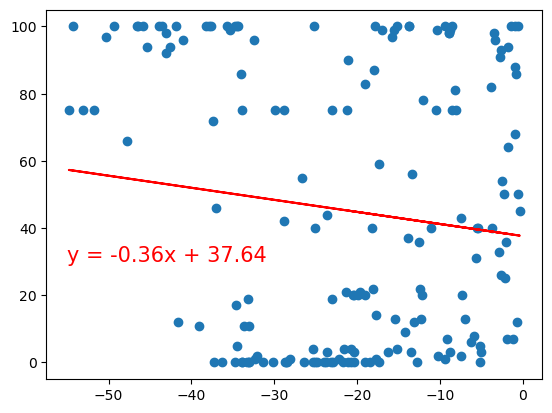

In [170]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55, 30))

**Discussion about the linear relationship:** Based on the two graphs presented I would conclude that in both hemispheres the linear regression is fairly steady. Showing that latitude has the same effect in both hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.008490919421742408


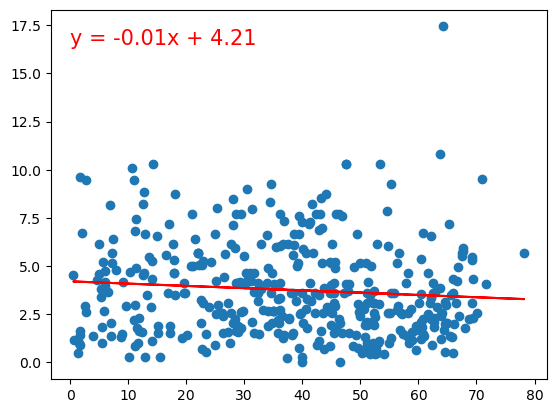

In [180]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Max Temp", (0, 16.5))

The r-value is 0.005010755895327817


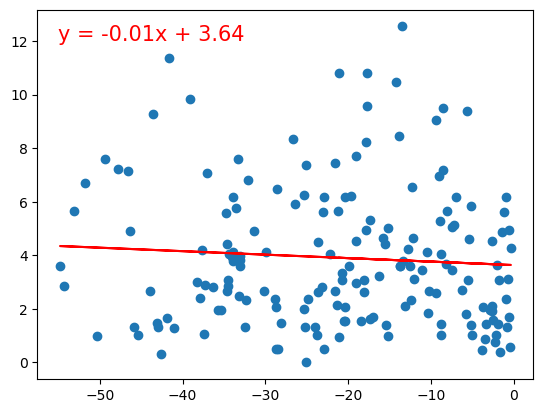

In [184]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55, 12))

**Discussion about the linear relationship:** Based on the two graphs presented I would conclude that in both hemispheres the linear regression is fairly steady. Showing that latitude has the same effect in both hemispheres.